**Step 1: Load the dataset and perform EDA**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/content/ONGC.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

         Date Symbol Series  Prev Close   Open   High    Low   Last   Close  \
0  2000-01-03   ONGC     EQ      207.70  205.0  214.4  205.0  214.0  213.45   
1  2000-01-04   ONGC     EQ      213.45  201.5  209.7  201.0  209.0  206.55   
2  2000-01-05   ONGC     EQ      206.55  201.0  223.1  200.5  223.1  223.10   
3  2000-01-06   ONGC     EQ      223.10  234.0  234.9  217.6  217.6  219.30   
4  2000-01-07   ONGC     EQ      219.30  223.0  223.0  213.0  215.7  215.75   

     VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  209.91    9600  2.015090e+11     NaN                 NaN          NaN  
1  206.26   17900  3.692030e+11     NaN                 NaN          NaN  
2  215.46   27000  5.817490e+11     NaN                 NaN          NaN  
3  223.42   35600  7.953680e+11     NaN                 NaN          NaN  
4  215.19   11400  2.453145e+11     NaN                 NaN          NaN  


In [4]:
# Summary statistics
print(df.describe())

        Prev Close         Open         High          Low         Last  \
count  5306.000000  5306.000000  5306.000000  5306.000000  5306.000000   
mean    491.156954   491.914832   500.182152   482.758509   491.102657   
std     385.181628   385.689433   392.444581   378.243050   385.088030   
min      60.000000    59.400000    63.000000    50.000000    60.200000   
25%     177.462500   178.500000   180.712500   175.512500   177.475000   
50%     305.400000   306.000000   310.000000   301.725000   305.500000   
75%     845.125000   844.900000   859.300000   830.000000   844.775000   
max    1484.200000  1480.550000  1513.900000  1443.150000  1490.100000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5306.000000  5306.000000  5.306000e+03  5.306000e+03    2456.000000   
mean    491.138193   491.554470  4.627373e+06  1.192360e+14   62667.979642   
std     385.197861   385.476883  8.938633e+06  1.264207e+14   37654.192437   
min      60.000000   

In [5]:
# Check for missing values
print(df.isnull().sum())

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64


In [6]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

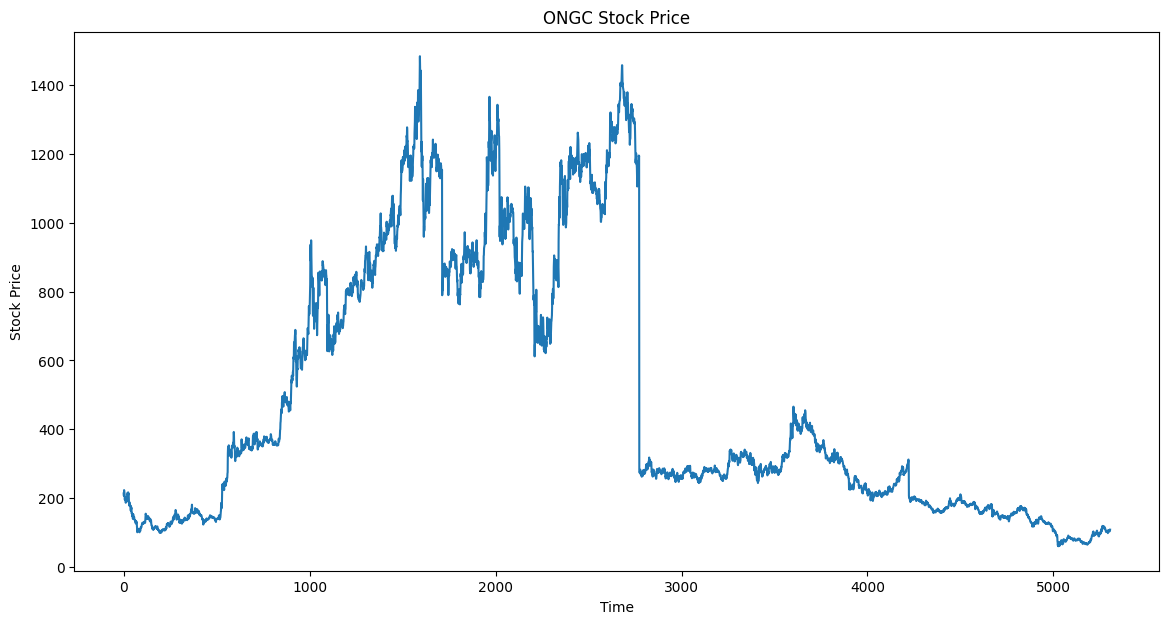

In [9]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('ONGC Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [10]:
# Data Preprocessing for all models
# Filling missing values (if any)
df.fillna(method='ffill', inplace=True)

In [12]:
from sklearn.preprocessing import StandardScaler
# Feature selection and scaling
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

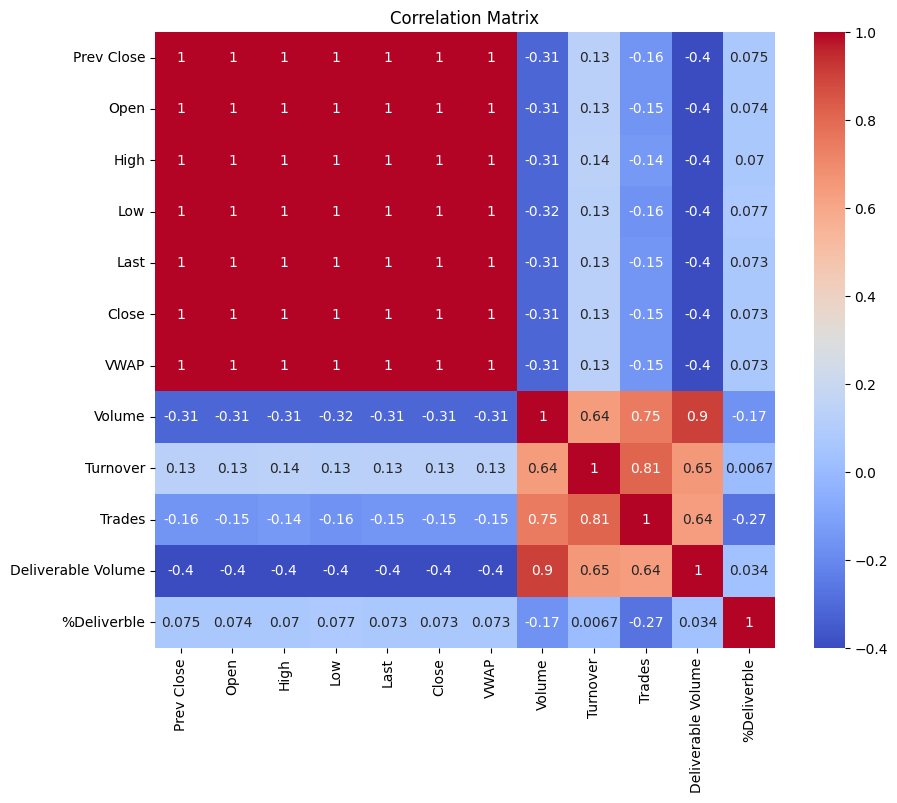

In [13]:
# Select only numeric columns before calculating the correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

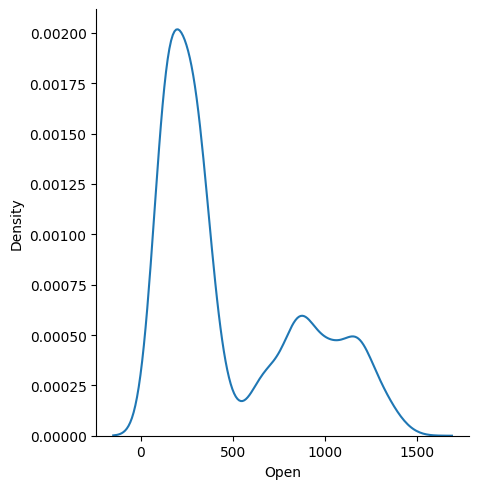

In [15]:
#Open Stock Price According to their density
sns.displot(df["Open"], kind="kde")

array([[<Axes: title={'center': 'Prev Close'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'VWAP'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Turnover'}>],
       [<Axes: title={'center': 'Trades'}>,
        <Axes: title={'center': 'Deliverable Volume'}>,
        <Axes: title={'center': '%Deliverble'}>]], dtype=object)

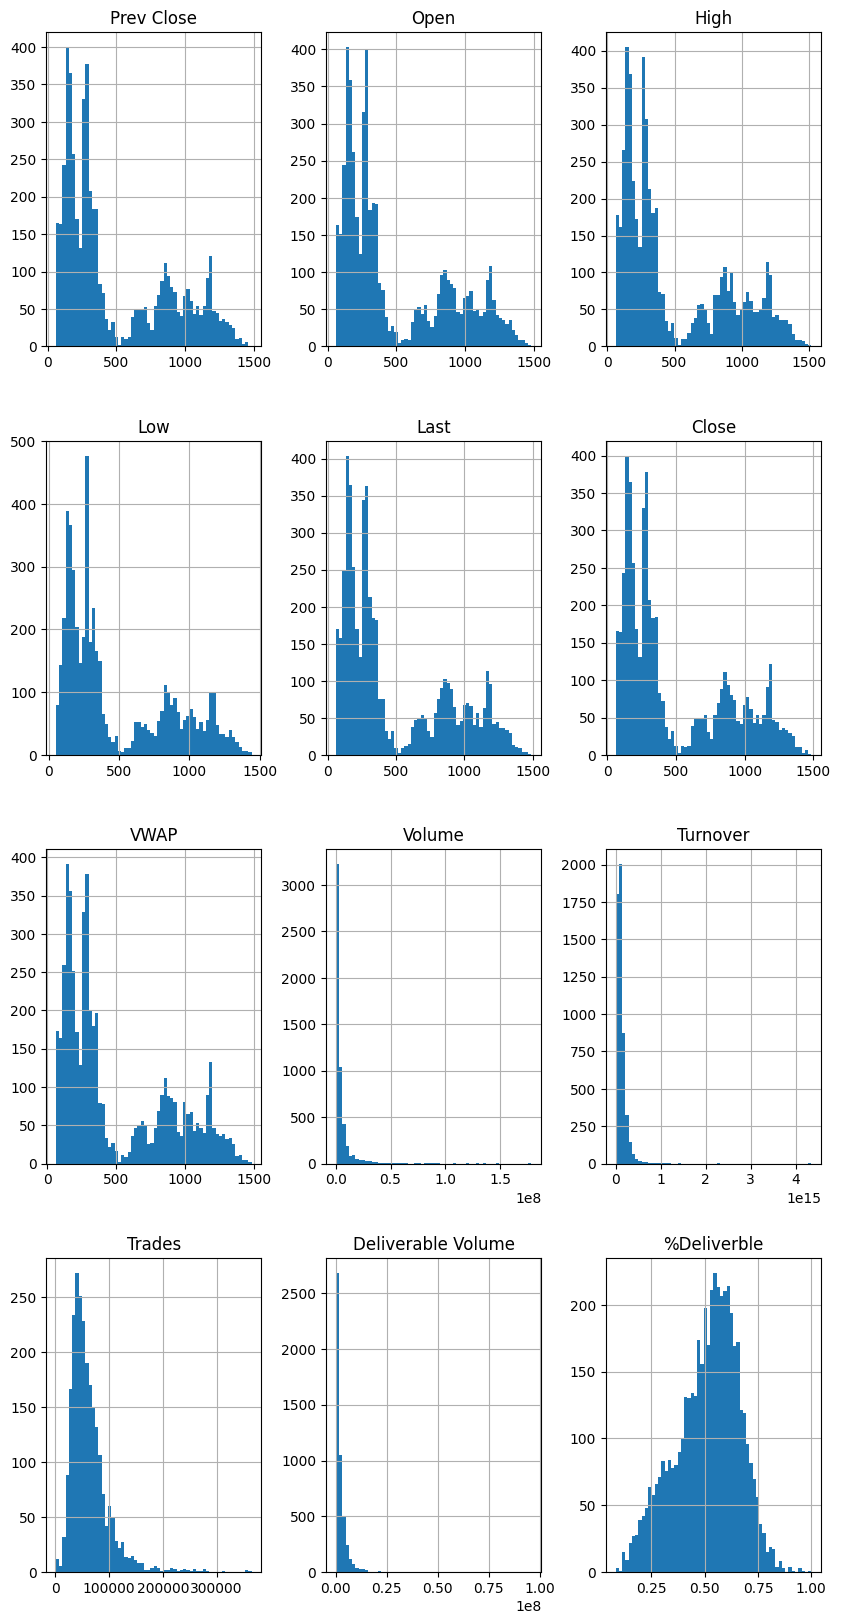

In [16]:
#Make Histogram of All Data set

df.hist(bins=60,figsize=(10,20))

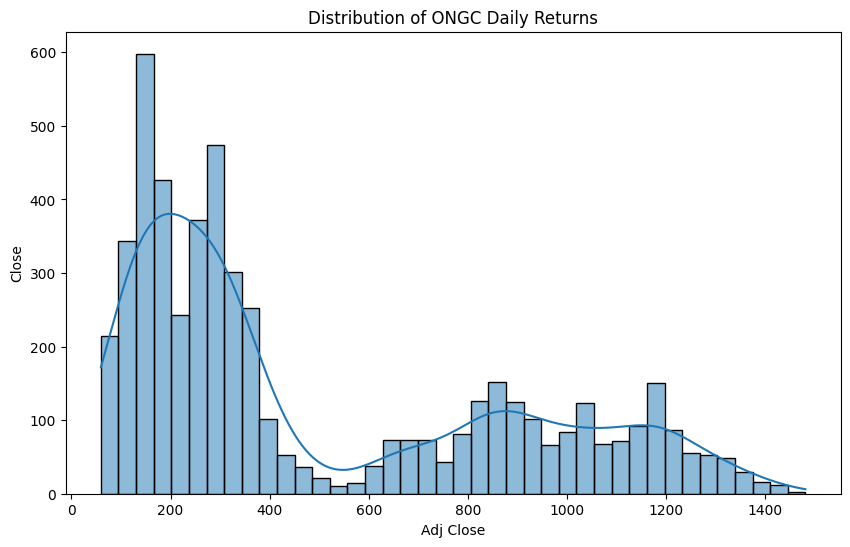

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Open'].dropna(), bins=40, kde=True)
plt.title('Distribution of ONGC Daily Returns')
plt.xlabel('Adj Close')
plt.ylabel('Close')
plt.show()

In [18]:
# Plot ONGC High Stock Prices

def volume_analysis(df,cmp_name):
    df['High'].plot(figsize=(10,7),title='ONGC '+cmp_name+' Stock Prices',c='orange')
    plt.ylabel('Volume')
    plt.show()

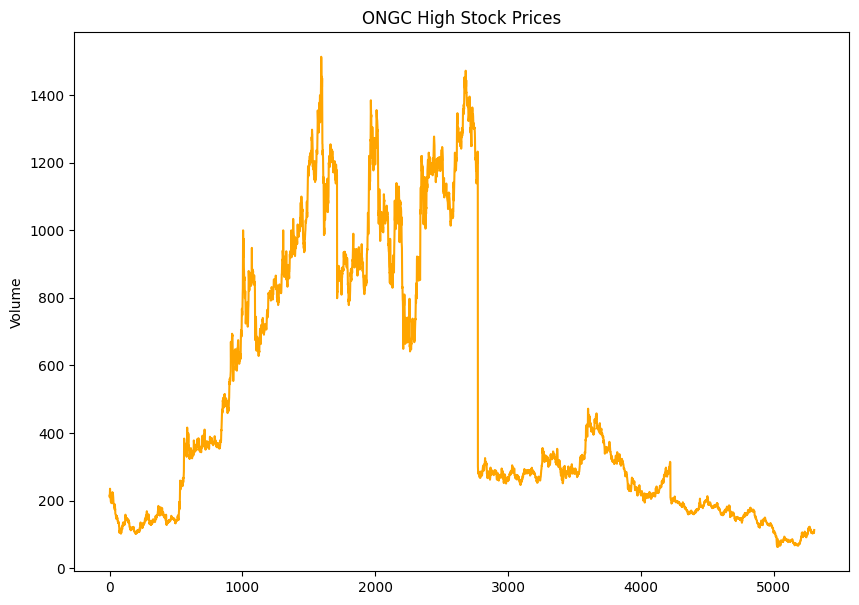

In [19]:
volume_analysis(df,'High')

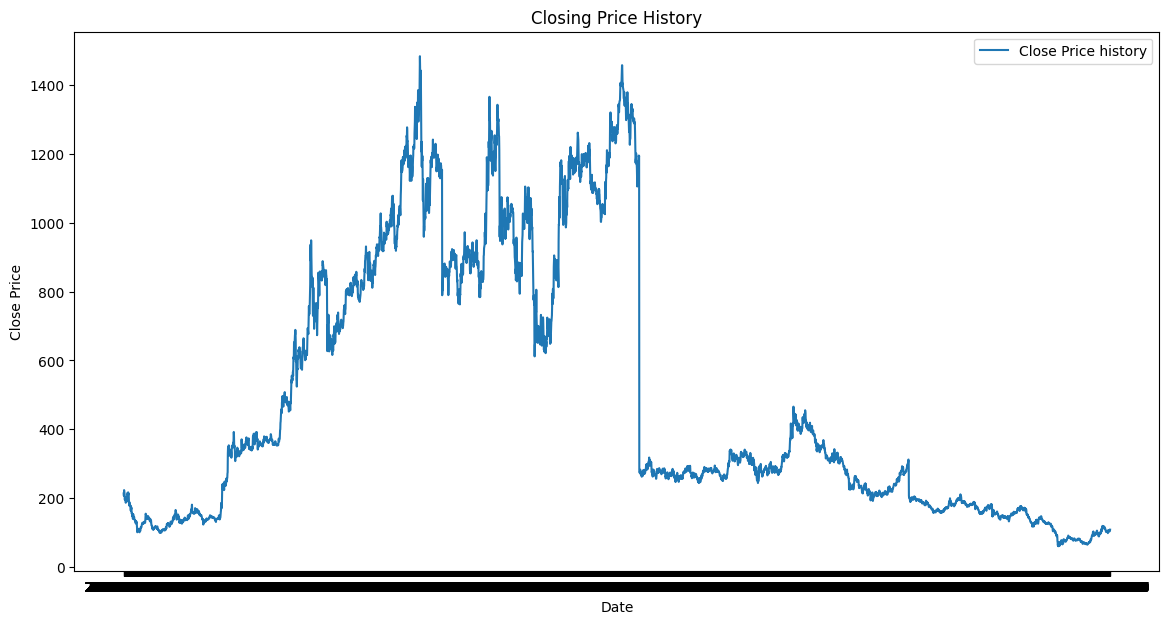

In [22]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price history')
plt.title('Closing Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Step 2: Data Preprocessing**


In [23]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [24]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataset by date
df = df.sort_values('Date')

# Use 'Close' price for prediction
data = df[['Close']].values

In [25]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [26]:
# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X, y = create_dataset(scaled_data, time_step)

**Step 3: Splitting the data into training and testing sets**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Reshape for LSTM [samples, time steps, features]
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**Step 4: Implementing the Models**

**LSTM Model**

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [31]:
# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=1))

In [32]:
# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# Train the model
model_lstm.fit(X_train_lstm, y_train, batch_size=64, epochs=50, validation_data=(X_test_lstm, y_test))

Epoch 1/50
66/66 [==============================] - 28s 326ms/step - loss: 0.0135 - val_loss: 0.0012
Epoch 2/50
66/66 [==============================] - 11s 168ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 3/50
66/66 [==============================] - 12s 178ms/step - loss: 9.5497e-04 - val_loss: 9.4729e-04
Epoch 4/50
66/66 [==============================] - 11s 160ms/step - loss: 8.7547e-04 - val_loss: 9.7836e-04
Epoch 5/50
66/66 [==============================] - 9s 136ms/step - loss: 8.1856e-04 - val_loss: 7.6572e-04
Epoch 6/50
66/66 [==============================] - 8s 118ms/step - loss: 8.2206e-04 - val_loss: 9.4224e-04
Epoch 7/50
66/66 [==============================] - 9s 130ms/step - loss: 7.8273e-04 - val_loss: 7.6662e-04
Epoch 8/50
66/66 [==============================] - 9s 139ms/step - loss: 7.3828e-04 - val_loss: 7.3792e-04
Epoch 9/50
66/66 [==============================] - 7s 113ms/step - loss: 7.0941e-04 - val_loss: 7.5368e-04
Epoch 10/50
66/66 [=====================

In [34]:
# Evaluate the model
train_predict = model_lstm.predict(X_train_lstm)
test_predict = model_lstm.predict(X_test_lstm)

33/33 [==============================] - 1s 25ms/step


In [35]:
# Inverse transform to get actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform([y_train])
y_test_actual = scaler.inverse_transform([y_test])

In [36]:
# Calculate RMSE
import math
from sklearn.metrics import mean_squared_error

rmse_train = math.sqrt(mean_squared_error(y_train_actual[0], train_predict[:,0]))
rmse_test = math.sqrt(mean_squared_error(y_test_actual[0], test_predict[:,0]))

print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}')

Train RMSE: 38.16937649976327
Test RMSE: 34.83609632872203


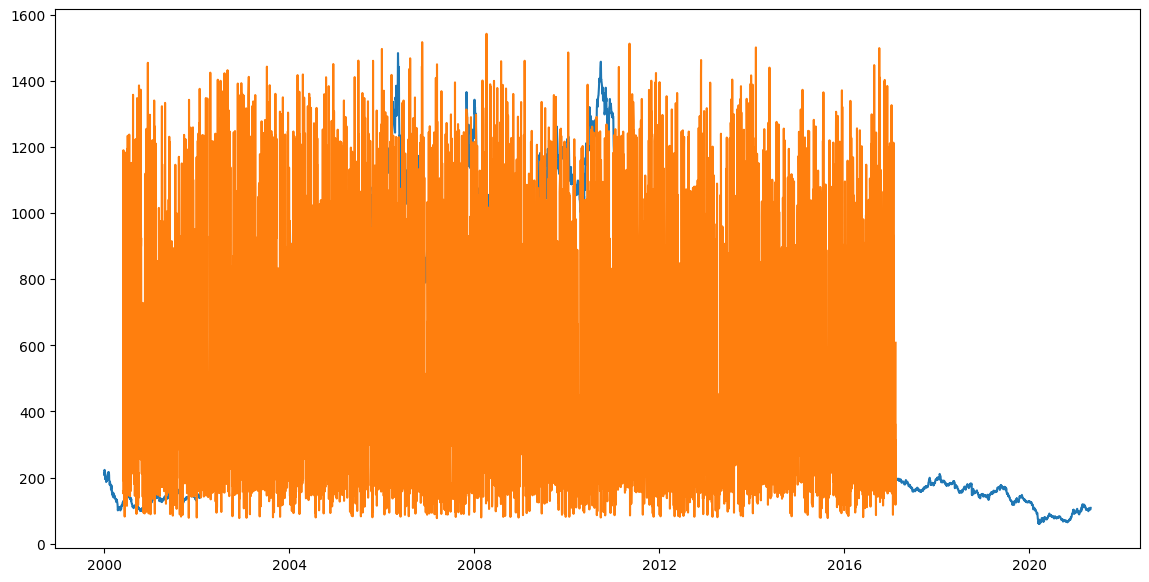

In [37]:
# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Price')
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict)+time_step, :] = train_predict
plt.plot(df['Date'], train_predict_plot, label='Train Predictions')

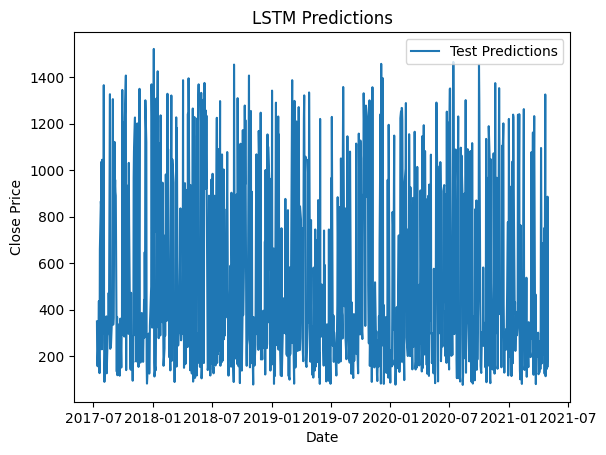

In [39]:
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
# Calculate the correct start index based on the length of the training data and time step
start_index = len(train_predict) + (time_step * 2) + 1
# Ensure the end index does not exceed the length of scaled_data
end_index = min(start_index + len(test_predict), len(scaled_data))
test_predict_plot[start_index:end_index, :] = test_predict[:(end_index-start_index)]  # Adjust the length of test_predict if needed
plt.plot(df['Date'], test_predict_plot, label='Test Predictions')
plt.title('LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**SVM Model**

In [41]:
from sklearn.svm import SVR

In [42]:
# Reshape data for SVM
X_train_svm = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_svm = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Build the SVM model
model_svm = SVR(kernel='rbf')

# Train the model
model_svm.fit(X_train_svm, y_train)

SVR()

In [44]:
# Evaluate the model
y_train_pred_svm = model_svm.predict(X_train_svm)
y_test_pred_svm = model_svm.predict(X_test_svm)

In [45]:
# Inverse transform to get actual values
y_train_pred_svm = scaler.inverse_transform(y_train_pred_svm.reshape(-1, 1))
y_test_pred_svm = scaler.inverse_transform(y_test_pred_svm.reshape(-1, 1))

# Calculate RMSE
rmse_train_svm = math.sqrt(mean_squared_error(y_train_actual[0], y_train_pred_svm[:, 0]))
rmse_test_svm = math.sqrt(mean_squared_error(y_test_actual[0], y_test_pred_svm[:, 0]))

print(f'Train RMSE (SVM): {rmse_train_svm}')
print(f'Test RMSE (SVM): {rmse_test_svm}')

Train RMSE (SVM): 64.19194137442236
Test RMSE (SVM): 62.888692945994656


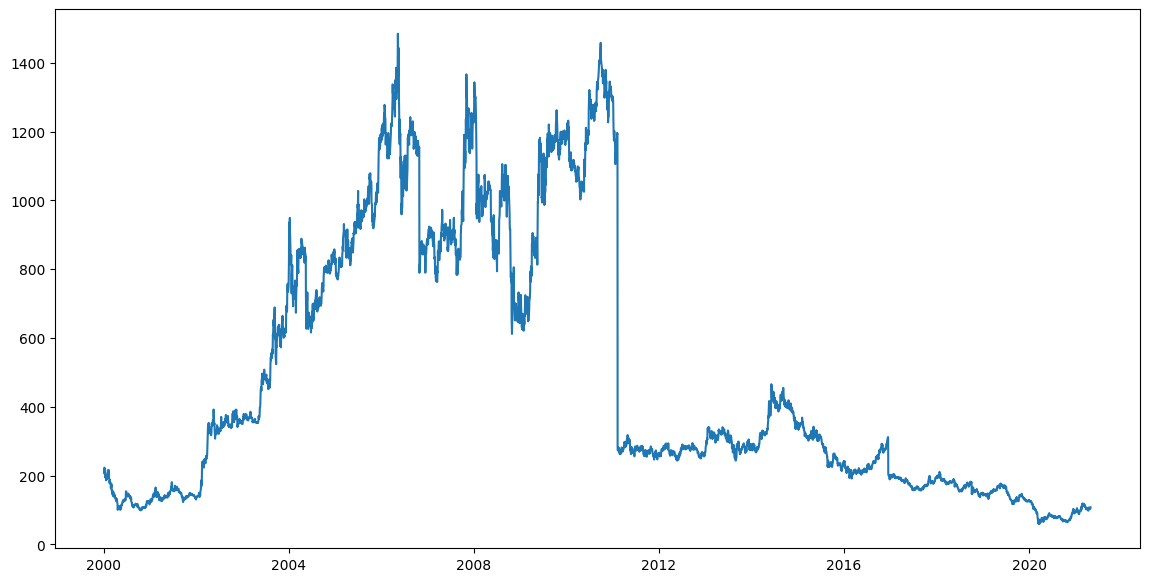

In [46]:
# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Price')

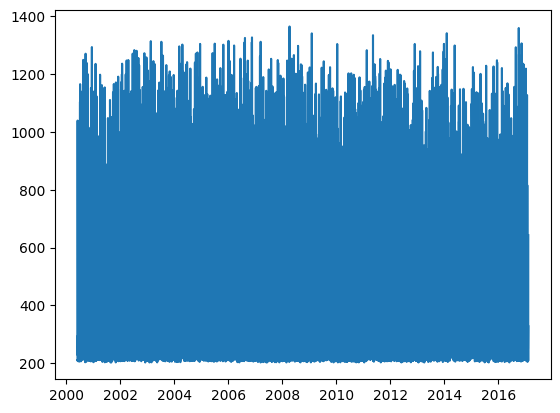

In [47]:
# Training predictions plot
train_predict_plot_svm = np.empty_like(scaled_data)
train_predict_plot_svm[:, :] = np.nan
train_predict_plot_svm[time_step:len(y_train_pred_svm)+time_step, :] = y_train_pred_svm
plt.plot(df['Date'], train_predict_plot_svm, label='Train Predictions (SVM)')

Text(0.5, 1.0, 'SVM Predictions')

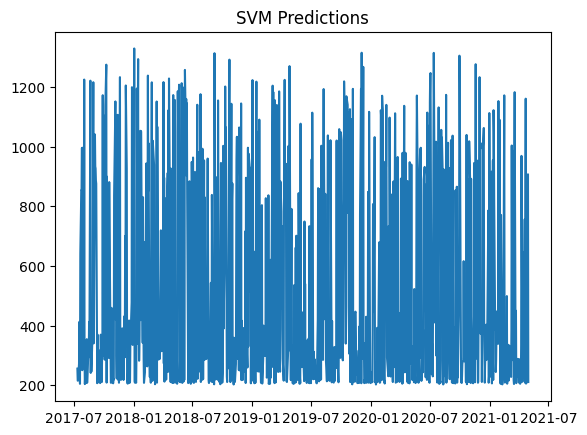

In [50]:
# Testing predictions plot
test_predict_plot_svm = np.empty_like(scaled_data)
test_predict_plot_svm[:, :] = np.nan
start_idx = len(y_train_pred_svm) + (time_step * 2) + 1
# Calculate end index based on the length of test_predict_plot_svm, not y_test_pred_svm
end_idx = len(test_predict_plot_svm)
test_predict_plot_svm[start_idx:end_idx, :] = y_test_pred_svm[:(end_idx-start_idx), :] # Slice y_test_pred_svm to fit

plt.plot(df['Date'], test_predict_plot_svm, label='Test Predictions (SVM)')
plt.title('SVM Predictions')

**KNN Model**

In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
# Build the KNN model
model_knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
model_knn.fit(X_train_svm, y_train)

# Evaluate the model
y_train_pred_knn = model_knn.predict(X_train_svm)
y_test_pred_knn = model_knn.predict(X_test_svm)

# Inverse transform to get actual values
y_train_pred_knn = scaler.inverse_transform(y_train_pred_knn.reshape(-1, 1))
y_test_pred_knn = scaler.inverse_transform(y_test_pred_knn.reshape(-1, 1))

In [54]:
# Calculate RMSE
rmse_train_knn = math.sqrt(mean_squared_error(y_train_actual[0], y_train_pred_knn[:, 0]))
rmse_test_knn = math.sqrt(mean_squared_error(y_test_actual[0], y_test_pred_knn[:, 0]))

print(f'Train RMSE (KNN): {rmse_train_knn}')
print(f'Test RMSE (KNN): {rmse_test_knn}')

Train RMSE (KNN): 18.822079531280394
Test RMSE (KNN): 16.60314156412186


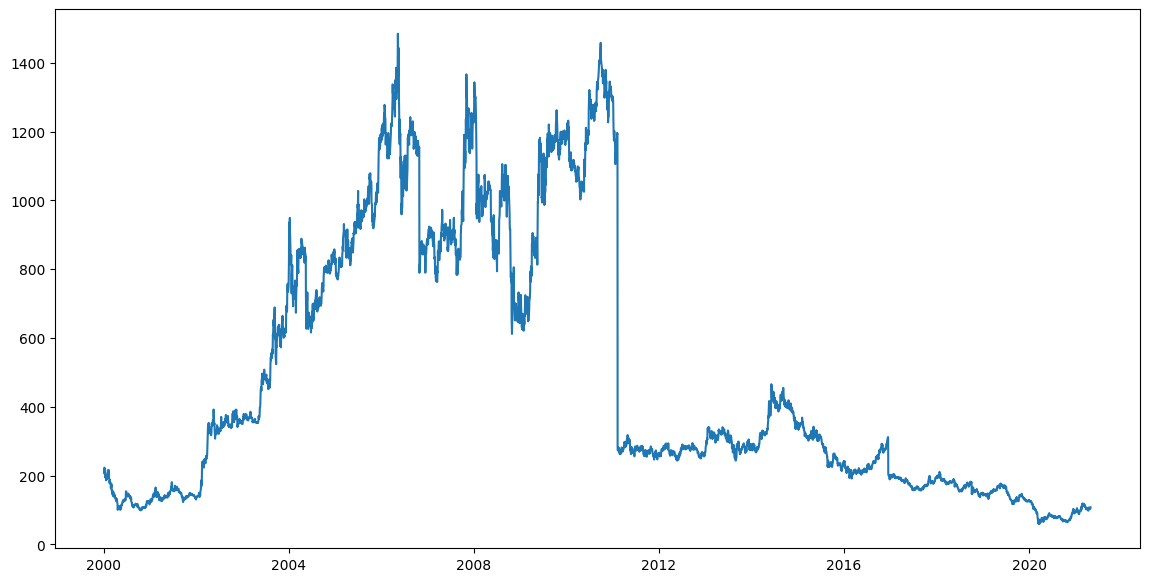

In [55]:
# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Price')

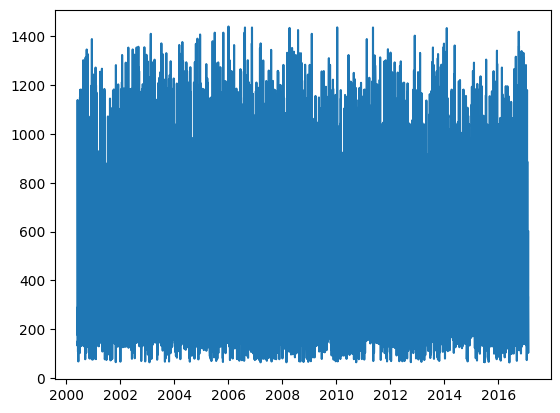

In [56]:
# Training predictions plot
train_predict_plot_knn = np.empty_like(scaled_data)
train_predict_plot_knn[:, :] = np.nan
train_predict_plot_knn[time_step:len(y_train_pred_knn)+time_step, :] = y_train_pred_knn
plt.plot(df['Date'], train_predict_plot_knn, label='Train Predictions (KNN)')

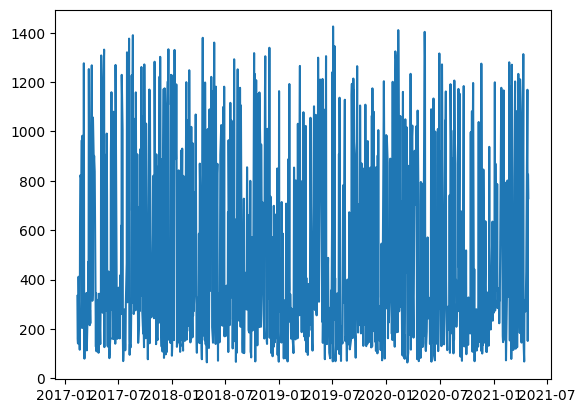

In [63]:
# Testing predictions plot
test_predict_plot_knn = np.empty_like(scaled_data)
test_predict_plot_knn[:, :] = np.nan
# Calculate the correct start index based on the length of training data and time_step
start_idx = len(y_train_pred_knn) + time_step
# End index should be start index plus the length of the test predictions
end_idx = start_idx + len(y_test_pred_knn)
test_predict_plot_knn[start_idx:end_idx, :] = y_test_pred_knn
plt.plot(df['Date'], test_predict_plot_knn, label='Test Predictions (KNN)')